In [40]:
import pandas as pd
import numpy as np
require_cols = [4]
paydf = pd.read_excel('Lab Session Data.xlsx', usecols = require_cols, sheet_name = 'Purchase data')
cols = [1,2,3]
coldf = pd.read_excel('Lab Session Data.xlsx', usecols = cols, sheet_name = 'Purchase data')
cinv = np.linalg.pinv(coldf)
price = np.dot(cinv,paydf)
pd.DataFrame(price).head()

,0
0,1.0
1,55.0
2,18.0


In [41]:
X = np.linalg.pinv(cinv)
pd.DataFrame(X).head()

,0,1,2
0,20.0,6.0,2.0
1,16.0,3.0,6.0
2,27.0,6.0,2.0
3,19.0,1.0,2.0
4,24.0,4.0,2.0


In [42]:
paydf['Label'] = paydf['Payment (Rs)'].apply(lambda x: 'RICH' if x > 200 else 'POOR')
paydf.head(10)

,Payment (Rs),Label
0,386,RICH
1,289,RICH
2,393,RICH
3,110,POOR
4,280,RICH
5,167,POOR
6,271,RICH
7,274,RICH
8,148,POOR
9,198,POOR


In [43]:
data = pd.concat([coldf, paydf['Label']], axis=1)
data.columns = ['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Label']
pd.DataFrame(data).head(10)

,Candies (#),Mangoes (Kg),Milk Packets (#),Label
0,20,6,2,RICH
1,16,3,6,RICH
2,27,6,2,RICH
3,19,1,2,POOR
4,24,4,2,RICH
5,22,1,5,POOR
6,15,4,2,RICH
7,18,4,2,RICH
8,21,1,4,POOR
9,16,2,4,POOR


In [44]:
import statistics
irctc = pd.read_excel('Lab Session Data.xlsx', usecols = [1,2,3,4,5,6,7,8], sheet_name = "IRCTC Stock Price")
print(statistics.mean(irctc['Price']))
print(statistics.variance(irctc['Price']))

1560.663453815261
58732.365352539186


In [45]:
wednesdays = irctc[irctc['Day'] == 'Wed']
sample_mean = statistics.mean(wednesdays['Price'])
population_mean = statistics.mean(irctc['Price'])

print(sample_mean)
print(population_mean)

print(population_mean - sample_mean)
#Population mean is greater, so it means that the prices on Wednesdays are generally lesser than average.

1550.706
1560.663453815261
9.957453815261033


In [46]:
april = irctc[irctc['Month'] == 'Apr']
s_mean = statistics.mean(april['Price'])

print(population_mean - s_mean)
#In April, the prices were generally above average. 

-138.28917776368644


In [47]:
count = (irctc['Chg%'] < 0).sum()
loss_prob = count/len(irctc)
print(loss_prob)

0.4979919678714859


In [55]:
prof_prob = 1 - loss_prob
wedprof = (irctc['Day'] == 'Wed') & (irctc['Chg%'] > 0)
wedprof_prob = wedprof.sum()/len(wednesdays)
print(wedprof_prob)

0.42


In [62]:
wed = len(irctc['Day']=='Wed')/len(irctc['Day'])
cond_prob = wedprof_prob*wed
print(cond_prob)

0.42


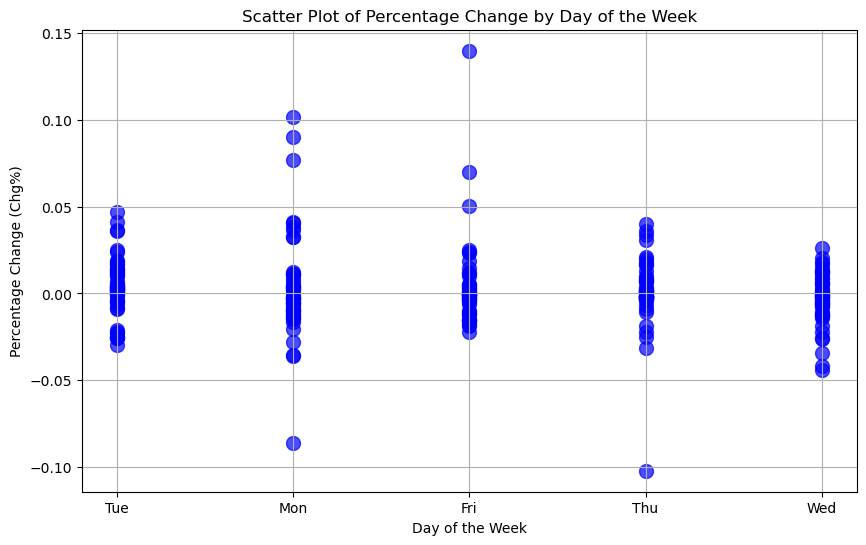

In [65]:
import matplotlib.pyplot as plt

days_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
irctc['Day'] = pd.Categorical(irctc['Day'], categories=days_order, ordered=True)
plt.figure(figsize=(10, 6))
plt.scatter(irctc['Day'], irctc['Chg%'], color='blue', s=100, alpha=0.7)
plt.xlabel('Day of the Week')
plt.ylabel('Percentage Change (Chg%)')
plt.title('Scatter Plot of Percentage Change by Day of the Week')
plt.grid(True)
plt.show()

In [81]:
import pandas as pd
import numpy as np

thyroid = pd.read_excel('Lab Session Data.xlsx', sheet_name = 'thyroid0387_UCI')
ID_avg = np.average(thyroid['Record ID'])
ID_var = np.var(thyroid['Record ID'])
print("Record ID Average: ", ID_avg)
print("Record ID Variance: ", ID_var)

age_avg = np.average(thyroid['age'])
age_var = np.var(thyroid['age'])
print("Age Average: ", age_avg)
print("Age Variance: ", age_var)

thyroid['TSH'] = pd.to_numeric(thyroid['TSH'], errors = 'coerce')
tsh_avg = thyroid['TSH'].dropna().mean()
tsh_var = thyroid['TSH'].dropna().var()
print("TSH Average: ", tsh_avg)
print("TSH Variance: ", tsh_var)

thyroid['T3'] = pd.to_numeric(thyroid['T3'], errors = 'coerce')
t3_avg = thyroid['T3'].dropna().mean()
t3_var = thyroid['T3'].dropna().var()
print("T3 Average: ", t3_avg)
print("T3 Variance: ", t3_var)

thyroid['TT4'] = pd.to_numeric(thyroid['TT4'], errors = 'coerce')
tt4_avg = thyroid['TT4'].dropna().mean()
tt4_var = thyroid['TT4'].dropna().var()
print("TT4 Average: ", tt4_avg)
print("TT4 Variance: ", tt4_var)

thyroid['T4U'] = pd.to_numeric(thyroid['T4U'], errors = 'coerce')
t4u_avg = thyroid['T4U'].dropna().mean()
t4u_var = thyroid['T4U'].dropna().var()
print("T4U Average: ", t4u_avg)
print("T4U Variance: ", t4u_var)

thyroid['FTI'] = pd.to_numeric(thyroid['FTI'], errors = 'coerce')
fti_avg = thyroid['FTI'].dropna().mean()
fti_var = thyroid['FTI'].dropna().var()
print("FTI Average: ", fti_avg)
print("FTI Variance: ", fti_var)

thyroid['TBG'] = pd.to_numeric(thyroid['TBG'], errors = 'coerce')
tbg_avg = thyroid['TBG'].dropna().mean()
tbg_var = thyroid['TBG'].dropna().var()
print("TBG Average: ", tbg_avg)
print("TBG Variance: ", tbg_var)


Record ID Average:  852947346.6122983
Record ID Variance:  57479983005406.1
Age Average:  73.55582206716092
Age Variance:  1401648.0340622675
TSH Average:  5.218402753781513
TSH Variance:  584.866153209295
T3 Average:  1.9706288057247257
T3 Variance:  0.7877961683561565
TT4 Average:  108.70030469644902
TT4 Variance:  1407.950791475491
T4U Average:  0.9760557216309935
T4U Variance:  0.04014430639006391
FTI Average:  113.64074551935484
FTI Variance:  1726.539585061158
TBG Average:  29.87005729512894
TBG Variance:  444.38764299946627
